In [136]:
import numpy as np
import os
import pandas as pd
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm
import matplotlib.pyplot as plt

In [97]:
datasets_path = "datasets/Classical/{}"

all_datasets = os.listdir(datasets_path.format(""))

- 6_cardio (mostly correlated)
- 24_mnist.npz (some correlated, some uncorrelated)
- 10_cover.npz (some correlated, some uncorrelated)
- 35_SpamBase.npz (some correlated, most uncorrelated)

In [98]:
details = []

for dataset in all_datasets:
    data = np.load(datasets_path.format(dataset), allow_pickle=True)
    X, y = data['X'], data['y']
    parts = dataset.split("_")
    details.append([dataset, parts[0], parts[1],X.shape[0], X.shape[1], y.sum(), y.sum()/y.shape[0]])

details = pd.DataFrame(details, columns=["Filename", "Number", "Dataset", "Samples", "Features", "Anomaly", "%Anomaly"])
details["Number"] = details["Number"].astype(int)
details = details.sort_values("Number").reset_index(drop=True)
details

,Filename,Number,Dataset,Samples,Features,Anomaly,%Anomaly
0,1_ALOI.npz,1,ALOI.npz,49534,27,1508,0.030444
1,2_annthyroid.npz,2,annthyroid.npz,7200,6,534,0.074167
2,3_backdoor.npz,3,backdoor.npz,95329,196,2329,0.024431
3,4_breastw.npz,4,breastw.npz,683,9,239,0.349927
4,5_campaign.npz,5,campaign.npz,41188,62,4640,0.112654
5,6_cardio.npz,6,cardio.npz,1831,21,176,0.096122
6,7_Cardiotocography.npz,7,Cardiotocography.npz,2114,21,466,0.220435
7,8_celeba.npz,8,celeba.npz,202599,39,4547,0.022443
8,9_census.npz,9,census.npz,299285,500,18568,0.062041
9,10_cover.npz,10,cover.npz,286048,10,2747,0.009603


In [99]:
filterd_details = details[(details["Samples"] >= 1000) & (details["Features"] >= 10) & (details["Features"] <= 100)]
filterd_details

,Filename,Number,Dataset,Samples,Features,Anomaly,%Anomaly
0,1_ALOI.npz,1,ALOI.npz,49534,27,1508,0.030444
4,5_campaign.npz,5,campaign.npz,41188,62,4640,0.112654
5,6_cardio.npz,6,cardio.npz,1831,21,176,0.096122
6,7_Cardiotocography.npz,7,Cardiotocography.npz,2114,21,466,0.220435
7,8_celeba.npz,8,celeba.npz,202599,39,4547,0.022443
9,10_cover.npz,10,cover.npz,286048,10,2747,0.009603
10,11_donors.npz,11,donors.npz,619326,10,36710,0.059274
11,12_fault.npz,12,fault.npz,1941,27,673,0.346728
12,13_fraud.npz,13,fraud.npz,284807,29,492,0.001727
18,19_landsat.npz,19,landsat.npz,6435,36,1333,0.207148


In [100]:
vifs_ge5 = []

for dataset in tqdm(filterd_details["Filename"]):
    data = np.load(datasets_path.format(dataset), allow_pickle=True)
    X, y = data['X'], data['y']
    vifs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vifs_ge5.append(sum(np.array(vifs) >= 5))

filterd_details["VIF>5"] =  vifs_ge5
filterd_details

  5%|▍         | 1/21 [00:02<00:53,  2.67s/it]/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
 52%|█████▏    | 11/21 [01:20<00:49,  4.99s/it]/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
 62%|██████▏   | 13/21 [01:24<00:29,  3.67s/it]/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
100%|██████████| 21/21 [01:2

,Filename,Number,Dataset,Samples,Features,Anomaly,%Anomaly,VIF>5
0,1_ALOI.npz,1,ALOI.npz,49534,27,1508,0.030444,0
4,5_campaign.npz,5,campaign.npz,41188,62,4640,0.112654,58
5,6_cardio.npz,6,cardio.npz,1831,21,176,0.096122,7
6,7_Cardiotocography.npz,7,Cardiotocography.npz,2114,21,466,0.220435,11
7,8_celeba.npz,8,celeba.npz,202599,39,4547,0.022443,29
9,10_cover.npz,10,cover.npz,286048,10,2747,0.009603,0
10,11_donors.npz,11,donors.npz,619326,10,36710,0.059274,1
11,12_fault.npz,12,fault.npz,1941,27,673,0.346728,23
12,13_fraud.npz,13,fraud.npz,284807,29,492,0.001727,29
18,19_landsat.npz,19,landsat.npz,6435,36,1333,0.207148,36


In [101]:
filterd_details["%VIF>5"] = filterd_details["VIF>5"]/filterd_details["Features"] 
filterd_details.sort_values("%VIF>5")

/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_1008/4278486557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_details["%VIF>5"] = filterd_details["VIF>5"]/filterd_details["Features"]


,Filename,Number,Dataset,Samples,Features,Anomaly,%Anomaly,VIF>5,%VIF>5
0,1_ALOI.npz,1,ALOI.npz,49534,27,1508,0.030444,0,0.000000
29,30_satellite.npz,30,satellite.npz,6435,36,2036,0.316395,0,0.000000
9,10_cover.npz,10,cover.npz,286048,10,2747,0.009603,0,0.000000
19,20_letter.npz,20,letter.npz,1600,32,100,0.062500,0,0.000000
34,35_SpamBase.npz,35,SpamBase.npz,4207,57,1679,0.399097,2,0.035088
23,24_mnist.npz,24,mnist.npz,7603,100,700,0.092069,7,0.070000
10,11_donors.npz,11,donors.npz,619326,10,36710,0.059274,1,0.100000
21,22_magic.gamma.npz,22,magic.gamma.npz,19020,10,6688,0.351630,3,0.300000
5,6_cardio.npz,6,cardio.npz,1831,21,176,0.096122,7,0.333333
39,40_vowels.npz,40,vowels.npz,1456,12,50,0.034341,5,0.416667


[[3.10000000e+01 3.30000000e+01 6.27719386e-02 2.00000000e+00]
 [3.90000000e+01 5.70000000e+01 3.68774919e-01 3.00000000e+00]
 [3.00000000e+01 3.50000000e+01 5.58622126e-01 2.00000000e+00]
 [5.80000000e+01 5.90000000e+01 6.27085792e-01 5.00000000e+00]
 [2.70000000e+01 3.40000000e+01 6.69507355e-01 2.00000000e+00]
 [2.40000000e+01 2.50000000e+01 7.19014908e-01 2.00000000e+00]
 [2.90000000e+01 6.00000000e+01 7.22686574e-01 6.00000000e+00]
 [2.10000000e+01 4.80000000e+01 8.61325695e-01 2.00000000e+00]
 [5.40000000e+01 5.50000000e+01 8.99171774e-01 2.00000000e+00]
 [6.10000000e+01 6.30000000e+01 9.10420611e-01 8.00000000e+00]
 [1.40000000e+01 2.20000000e+01 9.86964432e-01 2.00000000e+00]
 [3.60000000e+01 4.20000000e+01 9.92311964e-01 2.00000000e+00]
 [4.00000000e+01 4.50000000e+01 1.03350435e+00 2.00000000e+00]
 [1.80000000e+01 2.00000000e+01 1.07855905e+00 2.00000000e+00]
 [5.60000000e+01 6.50000000e+01 1.08434938e+00 3.00000000e+00]
 [0.00000000e+00 2.30000000e+01 1.13751741e+00 2.000000

Text(0.5, 0.98, '35_SpamBase.npz')

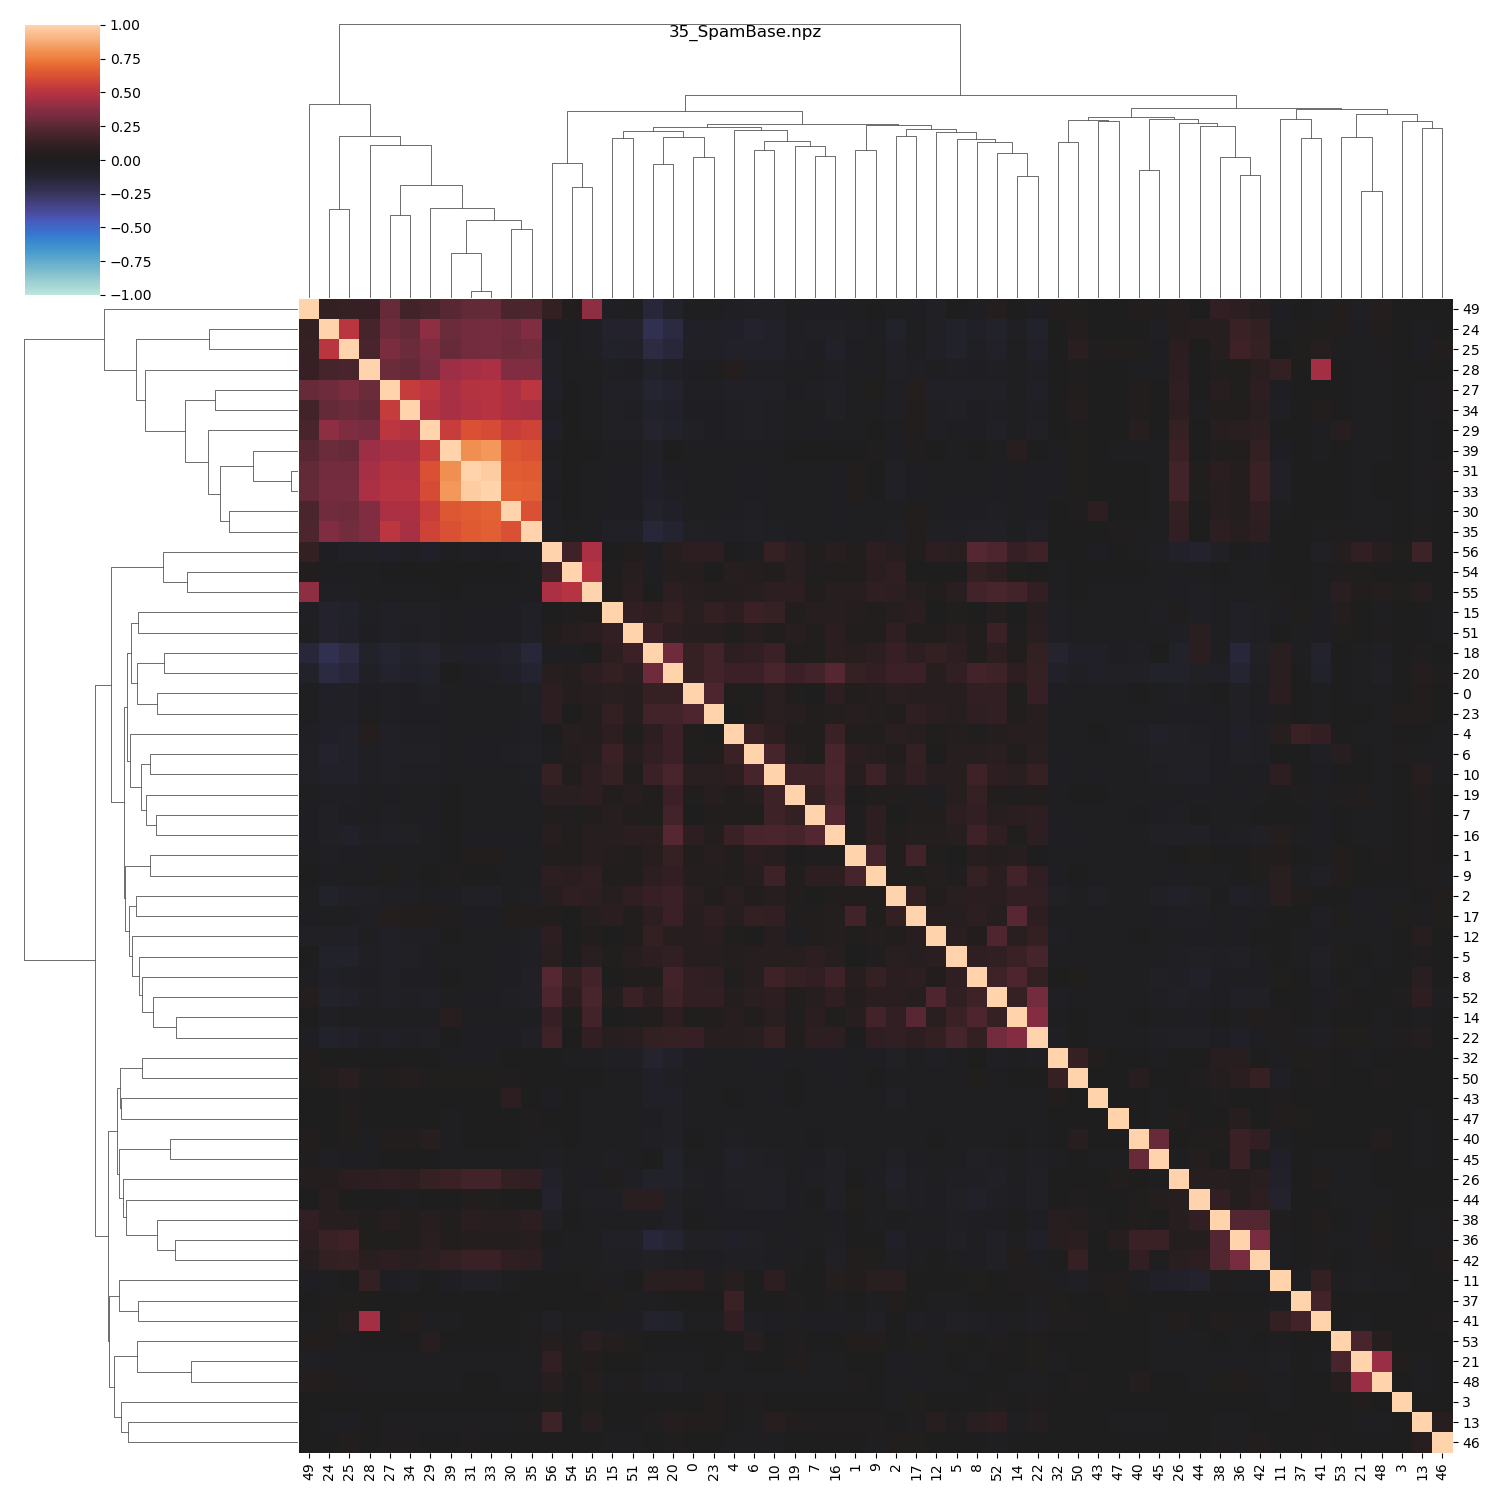

In [350]:
from scipy.cluster.hierarchy import linkage

dataset = "35_SpamBase.npz"
data = np.load(datasets_path.format(dataset), allow_pickle=True)
X, y = data['X'], data['y']
X = pd.DataFrame(X)
X = X.loc[:,X.nunique() > 1]
X.columns = range(X.columns.size)

corr = pd.DataFrame(X).corr()

Z = linkage(corr, method="average")
print(Z)
print(corr)
sns.clustermap(corr, row_linkage=Z, col_linkage=Z,vmin=-1, vmax=1, center=0, figsize=(15, 15)).fig.suptitle(dataset) 

In [351]:
from pyod.models.ecod import ECOD

ecod_output = ECOD().fit(X)
ecod_output.decision_scores_.shape

(4207,)

In [352]:
ecod_scores = pd.Series(ecod_output.decision_scores_).sort_values(ascending=False)
ecod_scores

2402    99.577375
1827    94.925545
3637    86.974961
2658    86.778251
3656    86.498850
          ...    
3518    15.826575
456     15.826520
3576    15.404514
1503    15.331626
1501    15.211999
Length: 4207, dtype: float64

In [353]:
vifs =  pd.DataFrame(np.array([variance_inflation_factor(X, i) for i in range(X.shape[1])]))
vifs

,0
0,1.227436
1,1.171040
2,1.400889
3,1.006204
4,1.324785
5,1.192924
6,1.215409
7,1.173822
8,1.314002
9,1.274747


In [354]:
vifs.sort_values(0, ascending=False)

,0
33,21.732809
31,19.469996
39,3.520807
35,2.430903
55,2.334398
30,2.298152
29,2.201471
18,2.107681
27,1.956365
20,1.923454


<AxesSubplot:>

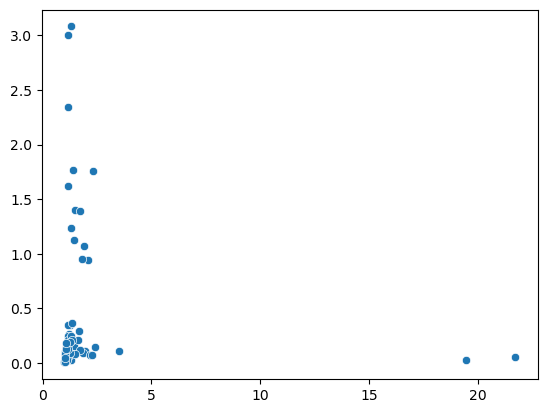

In [356]:
sns.scatterplot(y=ecod_output.O[0,:], x=vifs.values[:,0])

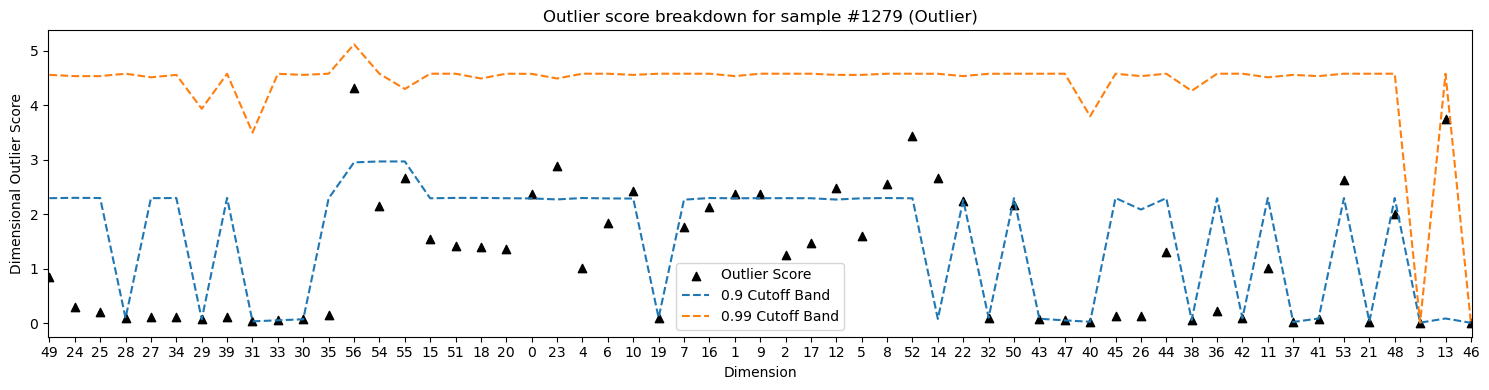

In [365]:
def explain_outlier(ecod_output, ind, vifs=None, columns=None, cutoffs=None,
                    feature_names=None, file_name=None,
                    file_type=None):  # pragma: no cover
    """Plot dimensional outlier graph for a given data point within
    the dataset.

    Parameters
    ----------
    ind : int
        The index of the data point one wishes to obtain
        a dimensional outlier graph for.

    columns : list
        Specify a list of features/dimensions for plotting. If not
        specified, use all features.

    cutoffs : list of floats in (0., 1), optional (default=[0.95, 0.99])
        The significance cutoff bands of the dimensional outlier graph.

    feature_names : list of strings
        The display names of all columns of the dataset,
        to show on the x-axis of the plot.

    file_name : string
        The name to save the figure

    file_type : string
        The file type to save the figure

    Returns
    -------
    Plot : matplotlib plot
        The dimensional outlier graph for data point with index ind.
    """
    if columns is None:
        columns = list(range(ecod_output.O.shape[1]))
        column_range = range(1, ecod_output.O.shape[1] + 1)
    else:
        column_range = range(1, len(columns) + 1)

    cutoffs = [1 - ecod_output.contamination,
                0.99] if cutoffs is None else cutoffs

    # plot outlier scores
    plt.scatter(column_range, ecod_output.O[ind, columns], marker='^', c='black',
                label='Outlier Score')
    
    # if vifs is not None:
    #     ax2 = plt.twinx()
    #     ax2.bar(column_range, vifs, color='red', alpha=0.1)
    #     ax2.set_ylim((0,max(vifs) + 5))

    for i in cutoffs:
        plt.plot(column_range,
                    np.quantile(ecod_output.O[:, columns], q=i, axis=0),
                    '--',
                    label='{percentile} Cutoff Band'.format(percentile=i))
    plt.xlim([1, max(column_range)])
    # plt.ylim([0, int(ecod_output.O[:, columns].max().max()) + 1])
    plt.ylabel('Dimensional Outlier Score')
    plt.xlabel('Dimension')

    ticks = list(column_range)
    if feature_names is not None:
        assert len(feature_names) == len(ticks), \
            "Length of feature_names does not match dataset dimensions."
        plt.xticks(ticks, labels=feature_names)
    else:
        plt.xticks(ticks)

    # plt.yticks(range(0, int(ecod_output.O[:, columns].max().max()) + 1))
    plt.xlim(0.95, ticks[-1] + 0.05)
    label = 'Outlier' if ecod_output.labels_[ind] == 1 else 'Inlier'
    plt.title(
        'Outlier score breakdown for sample #{index} ({label})'.format(
            index=ind + 1, label=label))
    plt.legend()
    plt.tight_layout()

    # save the file if specified
    if file_name is not None:
        if file_type is not None:
            plt.savefig(file_name + '.' + file_type, dpi=300)
        # if not specified, save as png
        else:
            plt.savefig(file_name + '.' + 'png', dpi=300)
    plt.show()

from scipy.cluster import hierarchy
order = hierarchy.leaves_list(Z)

plt.figure(figsize=(15,4))
explain_outlier(ecod_output, 1278, vifs=vifs[0][order], columns=order, feature_names=order)

In [363]:
ecod_scores[:160].index


y_pred = np.zeros(y.shape)
y_pred[ecod_scores[:160].index] = 1


df = pd.DataFrame({
    "y": y,
    "y_pred": y_pred,
    "ecod_scores": ecod_scores[ecod_scores.index.to_series().sort_values()].values
})


In [364]:
df[df["y"] > df["y_pred"]].sort_values("ecod_scores")

,y,y_pred,ecod_scores
1501,1,0.0,15.211999
1503,1,0.0,15.331626
456,1,0.0,15.826520
452,1,0.0,16.906242
427,1,0.0,17.838111
...,...,...,...
1366,1,0.0,67.430203
472,1,0.0,67.432791
1435,1,0.0,67.459313
455,1,0.0,67.665945


In [359]:
df.sort_values("ecod_scores", ascending=False).head()

,y,y_pred,ecod_scores
2402,0,1.0,99.577375
1827,0,1.0,94.925545
3637,0,1.0,86.974961
2658,0,1.0,86.778251
3656,0,1.0,86.498850
